## Importing Relevant Libraries

In [4]:
import pandas as pd
import numpy as np
import mysql.connector 
from mysql.connector import Error
import scipy.stats  as sct
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Establishing Connection to MySQL Database

In [7]:
def db_connect(hostname, username, password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host = hostname,
            user = username,
            password = password,
            database = db_name
        )
        print(f'You are now Connected to database {db_name}, you may fire on')
    except Error as err:
        print(f'Error: {err}')
    return connection
connection = db_connect('localhost', 'root', 'Moscow.1', 'northwind')

You are now Connected to database northwind, you may fire on


## Creating a read query function

In [8]:
def read_query(connection, query):
    result = None
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        result = cursor.fetchall()
    except Error as err:
        print(f'Error: {err}')
    return result

# Investigating Likely Causes of Late Delivery of Orders 

### Investigating the Likelihood of Employee Efficiency and Choice of Shipping Method(ShipperID) on Late Delivery of Orders

In [60]:
query_1 = '''
SELECT 
    o.OrderID,
    concat(e.LastName, ' ', e.FirstName) as `Employee_Name`, 
    s.CompanyName AS Shipping_Company, 
    o.ShipCity,
    o.OrderDate,
    o.ShippedDate,
    o.freight,
    DATEDIFF(ShippedDate, RequiredDate) AS Late_By
from orders o
join shippers s on o.ShipVia = s.ShipperID
join employees e on o.employeeid = e.EmployeeID
where o.ShippedDate>o.RequiredDate;

'''
result = read_query(connection, query_1)
result

[(10970,
  'Dodsworth Anne',
  'Speedy Express',
  'Madrid',
  datetime.datetime(1998, 3, 24, 0, 0),
  datetime.datetime(1998, 4, 24, 0, 0),
  Decimal('16.1600'),
  17),
 (10828,
  'Dodsworth Anne',
  'Speedy Express',
  'Buenos Aires',
  datetime.datetime(1998, 1, 13, 0, 0),
  datetime.datetime(1998, 2, 4, 0, 0),
  Decimal('90.8500'),
  8),
 (10660,
  'Callahan Laura',
  'Speedy Express',
  'Elgin',
  datetime.datetime(1997, 9, 8, 0, 0),
  datetime.datetime(1997, 10, 15, 0, 0),
  Decimal('111.2900'),
  9),
 (10596,
  'Callahan Laura',
  'Speedy Express',
  'Seattle',
  datetime.datetime(1997, 7, 11, 0, 0),
  datetime.datetime(1997, 8, 12, 0, 0),
  Decimal('16.3400'),
  4),
 (10927,
  'Peacock Margaret',
  'Speedy Express',
  'Versailles',
  datetime.datetime(1998, 3, 5, 0, 0),
  datetime.datetime(1998, 4, 8, 0, 0),
  Decimal('19.7900'),
  6),
 (10807,
  'Peacock Margaret',
  'Speedy Express',
  'Torino',
  datetime.datetime(1997, 12, 31, 0, 0),
  datetime.datetime(1998, 1, 30, 0, 0),


### Creating the Dataframe and Data Cleaning

In [61]:
data_list = []

for row in result:
    row = list(row)
    data_list.append(row)


    columns = [
        'OrderID','Employee_Name','Shipping_Company', 'Ship_City','OrderDate', 'ShippedDate', 'Freight','Late_By'
]

shippers_df = pd.DataFrame(data=data_list, columns=columns)
shippers_df

,OrderID,Employee_Name,Shipping_Company,Ship_City,OrderDate,ShippedDate,Freight,Late_By
0,10970,Dodsworth Anne,Speedy Express,Madrid,1998-03-24,1998-04-24,16.1600,17
1,10828,Dodsworth Anne,Speedy Express,Buenos Aires,1998-01-13,1998-02-04,90.8500,8
2,10660,Callahan Laura,Speedy Express,Elgin,1997-09-08,1997-10-15,111.2900,9
3,10596,Callahan Laura,Speedy Express,Seattle,1997-07-11,1997-08-12,16.3400,4
4,10927,Peacock Margaret,Speedy Express,Versailles,1998-03-05,1998-04-08,19.7900,6
5,10807,Peacock Margaret,Speedy Express,Torino,1997-12-31,1998-01-30,1.3600,2
6,10726,Peacock Margaret,Speedy Express,London,1997-11-03,1997-12-05,16.5600,18
7,10960,Leverling Janet,Speedy Express,San Cristbal,1998-03-19,1998-04-08,2.0800,6
8,10309,Leverling Janet,Speedy Express,Cork,1996-09-19,1996-10-23,47.3000,6
9,10727,Fuller Andrew,Speedy Express,Reggio Emilia,1997-11-03,1997-12-05,89.9000,4


In [62]:
shippers_df.shape


(37, 8)

In [63]:
# A quick look at some basic information about our dataset.
shippers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderID           37 non-null     int64         
 1   Employee_Name     37 non-null     object        
 2   Shipping_Company  37 non-null     object        
 3   Ship_City         37 non-null     object        
 4   OrderDate         37 non-null     datetime64[ns]
 5   ShippedDate       37 non-null     datetime64[ns]
 6   Freight           37 non-null     object        
 7   Late_By           37 non-null     int64         
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 2.4+ KB


In [64]:
# Checking the actual number of rows and columns containing null values
shippers_df.isnull().sum()

OrderID             0
Employee_Name       0
Shipping_Company    0
Ship_City           0
OrderDate           0
ShippedDate         0
Freight             0
Late_By             0
dtype: int64

Interpreting the check above, we were able to  the following:

1. All our attributes are in the right datatype except freight.
2. Our data frame contains 37 rows and 8 columns
3. No column contains null values.
   
Consequently, we shall convert freight data type from object to float since it is a monetary currency.

In [65]:
# converting freight to the right data_type.

shippers_df[['Freight']] = shippers_df[['Freight']].apply(pd.to_numeric)

In [51]:
shippers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   OrderID           37 non-null     int64         
 1   Shipping_Company  37 non-null     object        
 2   Ship_City         37 non-null     object        
 3   OrderDate         37 non-null     datetime64[ns]
 4   ShippedDate       37 non-null     datetime64[ns]
 5   Freight           37 non-null     float64       
 6   EmployeeID        37 non-null     int64         
 7   Late_By           37 non-null     int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 2.4+ KB


It will be important to know how long each of our orders took before shipping. Having this information will be important in our analysis. Therefore, we are going to generate a new column called waiting_period from order date and shipped date.

In [66]:
# create new column that contains order and shipping date difference.

shippers_df['waiting_period'] = (shippers_df['ShippedDate'] - shippers_df['OrderDate']) / np.timedelta64(1, 'D')

In [67]:
shippers_df.head(10)

,OrderID,Employee_Name,Shipping_Company,Ship_City,OrderDate,ShippedDate,Freight,Late_By,waiting_period
0,10970,Dodsworth Anne,Speedy Express,Madrid,1998-03-24,1998-04-24,16.16,17,31.0
1,10828,Dodsworth Anne,Speedy Express,Buenos Aires,1998-01-13,1998-02-04,90.85,8,22.0
2,10660,Callahan Laura,Speedy Express,Elgin,1997-09-08,1997-10-15,111.29,9,37.0
3,10596,Callahan Laura,Speedy Express,Seattle,1997-07-11,1997-08-12,16.34,4,32.0
4,10927,Peacock Margaret,Speedy Express,Versailles,1998-03-05,1998-04-08,19.79,6,34.0
5,10807,Peacock Margaret,Speedy Express,Torino,1997-12-31,1998-01-30,1.36,2,30.0
6,10726,Peacock Margaret,Speedy Express,London,1997-11-03,1997-12-05,16.56,18,32.0
7,10960,Leverling Janet,Speedy Express,San Cristbal,1998-03-19,1998-04-08,2.08,6,20.0
8,10309,Leverling Janet,Speedy Express,Cork,1996-09-19,1996-10-23,47.30,6,34.0
9,10727,Fuller Andrew,Speedy Express,Reggio Emilia,1997-11-03,1997-12-05,89.90,4,32.0


# Exploratory Data Analysis Using 2-Way ANOVA

## Performing a 2-way ANOVA.

Two-way ANOVA is a statistical method used to analyze the effect of two categorical variables on a continuous variable. Assumes normality, homogeneity of variance, and independence of observations. e.g., Investigating the effects of gender and age on sales performance.

In [69]:
# counting the number of unique elements in our categorical variable columns.

cols = ['Employee_Name', 'Shipping_Company', 'Ship_City']

for col in cols:
    a = shippers_df[col].nunique()
    print(f'There are {a} unique {col}')

There are 9 unique Employee_Name
There are 3 unique Shipping_Company
There are 26 unique Ship_City


In [72]:
pd.crosstab(shippers_df["Employee_Name"], shippers_df["Shipping_Company"], margins=True)

Shipping_Company,Federal Shipping,Speedy Express,United Package,All
Employee_Name,,,,
Buchanan Steven,1,0,0,1
Callahan Laura,1,2,1,4
Davolio Nancy,1,0,1,2
Dodsworth Anne,0,2,2,4
Fuller Andrew,0,3,1,4
King Robert,0,0,4,4
Leverling Janet,1,2,2,5
Peacock Margaret,3,3,4,10
Suyama Michael,2,0,1,3


Checking the total number of late orders by Employees and the Shipping companies used using histogram

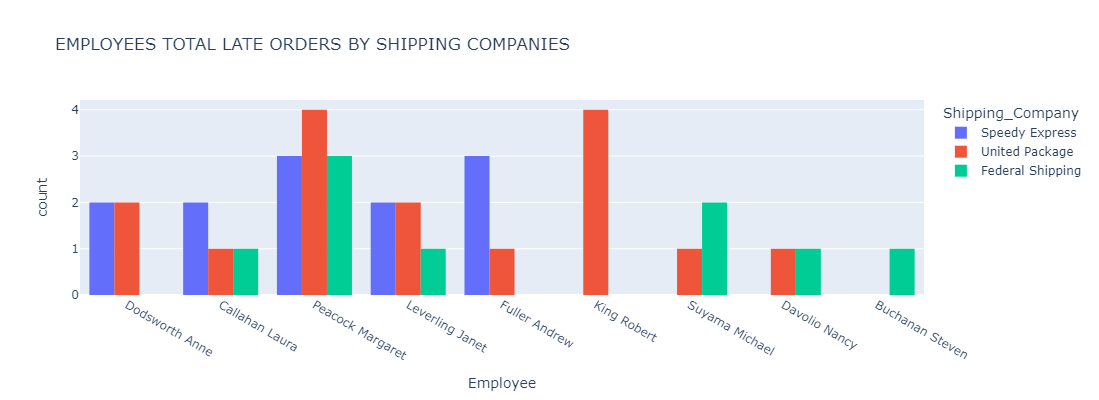

In [98]:
fig = px.histogram(shippers_df , x="Employee_Name", y="OrderID", labels={
                     "Employee_Name": "Employee"}, color='Shipping_Company', barmode='group',
             height=400, title = 'EMPLOYEES TOTAL LATE ORDERS BY SHIPPING COMPANIES', histfunc = 'count')
fig.show()

In [95]:
# Fit the model
model = ols('Late_By ~ C(Employee_Name) + C(Shipping_Company) + C(Employee_Name):C(Shipping_Company)', data=shippers_df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

print(anova_table)

                                          sum_sq    df         F    PR(>F)
Intercept                               1.000000   1.0  0.022630  0.882097
C(Employee_Name)                      139.818580   8.0  0.395506  0.908700
C(Shipping_Company)                    62.360226   2.0  0.705595  0.506971
C(Employee_Name):C(Shipping_Company)  337.981854  16.0  0.478026  0.910159
Residual                              795.416667  18.0       NaN       NaN


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 16, but rank is 13



## Setting our Hypothesis

In [102]:
pvalue_Employee_Name = anova_table['PR(>F)'].loc['C(Employee_Name)']
pvalue_Shipping_Company =  anova_table['PR(>F)'].loc['C(Shipping_Company)']
pvalue_interaction =  anova_table['PR(>F)'].loc['C(Employee_Name):C(Shipping_Company)']
null = 'There is no significant difference between Late_By and Employee_Name and Shipping_Company'
alternative = 'There is a significant difference between Late_By and Employee_Name and Shipping_Company'

# choose a level of significance
alpha = 0.05


# decision rule
if pvalue_interaction  < alpha:
  print(f'reject null hypothesis')
  print(f'Conclusion: {alternative}')
else:
  print(f'reject alternative hypothesis')
  print(f'Conclusion: {null}')
print(f'pvalue: {pvalue_interaction}')

reject alternative hypothesis
Conclusion: There is no significant difference between Late_By and Employee_Name and Shipping_Company
pvalue: 0.9101587838437645


## Conclusion
From the analysis above, it could be concluded that both the employee handling the orders and the shipping companies have no statistically significant influence on delivery delays (late orders) in the Northwind database. The interaction between these factors is also not significant, suggesting that the effect of one factor does not depend on the level of the other factor.

### Investigating whether Employees handling orders and Cities in which the order is going has a significant effect on Late Delivery of Orders

In [104]:
pd.crosstab(shippers_df["Employee_Name"], shippers_df["Ship_City"], margins=True)

Ship_City,Boise,Brcke,Buenos Aires,Campinas,Charleroi,Cork,Cowes,Cunewalde,Elgin,Eugene,...,Marseille,Oulu,Reggio Emilia,Salzburg,San Cristbal,Seattle,Torino,Versailles,Walla Walla,All
Employee_Name,,,,,,,,,,,,,,,,,,,,,
Buchanan Steven,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
Callahan Laura,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,4
Davolio Nancy,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,2
Dodsworth Anne,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4
Fuller Andrew,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,4
King Robert,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,4
Leverling Janet,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5
Peacock Margaret,1,0,0,0,1,0,1,1,0,1,...,0,0,0,1,0,0,1,1,0,10
Suyama Michael,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


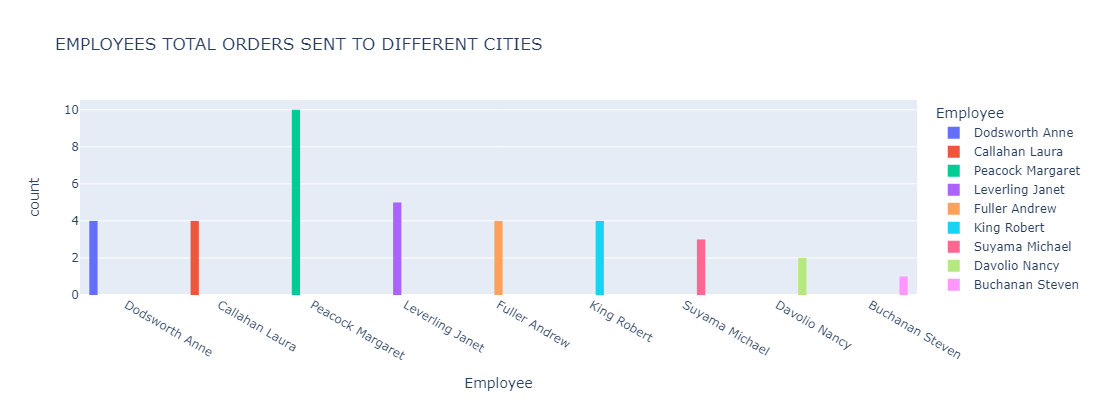

In [110]:
fig = px.histogram(shippers_df , x="Employee_Name", y="Ship_City", labels={
                     "Employee_Name": "Employee"}, color='Employee_Name', barmode='group',
             height=400, title = 'EMPLOYEES TOTAL ORDERS SENT TO DIFFERENT CITIES', histfunc = 'count')
fig.show()

In [111]:
# Fit the model
model = ols('Late_By ~ C(Employee_Name) + C(Ship_City) + C(Employee_Name):C(Ship_City)', data=shippers_df).fit()
anova_table = sm.stats.anova_lm(model, typ=3)

print(anova_table)

                                    sum_sq     df         F    PR(>F)
Intercept                       311.126024    1.0  2.765565  0.344661
C(Employee_Name)                162.870405    8.0  0.180967  0.953371
C(Ship_City)                    810.822930   25.0  0.288293  0.925666
C(Employee_Name):C(Ship_City)  6638.563830  200.0  0.295047  0.925639
Residual                        112.500000    1.0       NaN       NaN


C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 200, but rank is 34



In [112]:
pvalue_Employee_Name = anova_table['PR(>F)'].loc['C(Employee_Name)']
pvalue_Ship_City =  anova_table['PR(>F)'].loc['C(Ship_City)']
pvalue_interaction =  anova_table['PR(>F)'].loc['C(Employee_Name):C(Ship_City)']
null = 'There is no significant difference between Late_By and Employee_Name and Ship_City'
alternative = 'There is a significant difference between Late_By and Employee_Name andShip_City'

# choose a level of significance
alpha = 0.05


# decision rule
if pvalue_interaction  < alpha:
  print(f'reject null hypothesis')
  print(f'Conclusion: {alternative}')
else:
  print(f'reject alternative hypothesis')
  print(f'Conclusion: {null}')
print(f'pvalue: {pvalue_interaction}')

reject alternative hypothesis
Conclusion: There is no significant difference between Late_By and Employee_Name and Ship_City
pvalue: 0.9256386271205385


## Conclusion
From the analysis above, it could be concluded that both the employee handling the orders and the cities to which the orders are sent have no statistically significant influence on delivery delays (late orders) in the Northwind database. The interaction between these factors is also not significant, suggesting that the effect of one factor does not depend on the level of the other factor.